# 1. Currency Exchange Rate:-
####    - A exchage rate is the price of the domestic currency stated in terms of another currency.
####    - A global currency is the one that is accepted for trade throughout the world. The U.S. Dollar is the strongest world                                   currency so governments acroos the world set USD as an international currency for trade.
####    - Banks and other registered currency traders act as intermediates in currency exchange markets.
####    - Trading doesn't happen during weekends and public holidays.
####    - Currency exchange rates are determined by supply and demand in the market. However there are many leading factors that                   effects the currenct exchange rate. The main factor that impact currency rate is "Inflation Rates".
####    - Other factors are :- Intrest Rates, Country's current account/balance of payments, government debt, political stability         and               performance.

# 2. EDA
        - Importing libraries
        - Loading data
        - Basic opertaions

In [1]:
# importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
ex_rate = pd.read_excel("C:/Users/Irfan Shaik/Documents/ExcelR Project/DEXINUS (1).xls")
ex_rate.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [3]:
ex_rate.tail()

,observation_date,DEXINUS
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [4]:
ex_rate.dtypes

observation_date    datetime64[ns]
DEXINUS                    float64
dtype: object

In [5]:
ex_rate.shape

(12649, 2)

In [6]:
ex_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12649 non-null  datetime64[ns]
 1   DEXINUS           12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [7]:
ex_rate.describe()

,DEXINUS
count,12155.000000
mean,34.206133
std,21.089190
min,7.190000
25%,12.075000
50%,35.890000
75%,47.650000
max,76.950000


### 2.1 Outliers detection

<AxesSubplot:>

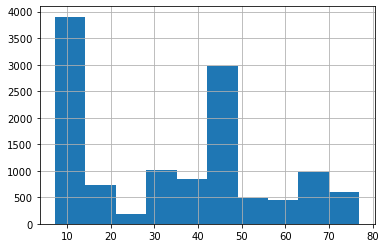

In [8]:
# Histogram for DEXINUS
ex_rate['DEXINUS'].hist()

<AxesSubplot:>

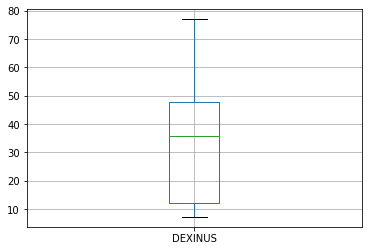

In [9]:
ex_rate.boxplot(column = ['DEXINUS'])

### 2.2 Missing values and Imputation

In [10]:
ex_rate.isnull().sum()

observation_date      0
DEXINUS             494
dtype: int64

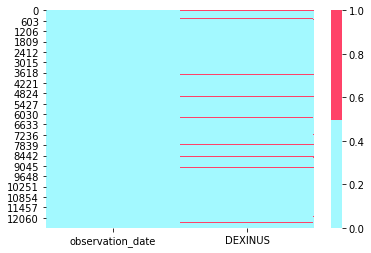

In [11]:
import seaborn as sns
plt.figure(figsize = (6,4))
cols = ex_rate.columns
colours = ['#a3f9ff','#ff4268'] # Specifing the red color lines as missing values and blue as not missing values
sns.heatmap(ex_rate[cols].isnull(), cmap = sns.color_palette(colours))
plt.show()

In [12]:
ex_rate[ex_rate.isnull().any(axis = 1)].head(10)

,observation_date,DEXINUS
29,1973-02-12,NaN
30,1973-02-13,NaN
31,1973-02-14,NaN
34,1973-02-19,NaN
43,1973-03-02,NaN
44,1973-03-05,NaN
104,1973-05-28,NaN
131,1973-07-04,NaN
174,1973-09-03,NaN
199,1973-10-08,NaN


####  There are total of 494 null values in the dataset. The null values are because of weekends and public hilodays declares by                      federal bank of America. The currency exchange markets are closed on these days.

#### - Here removing the null values is not a preferred approch. If i remove the null values from the data i loose almost 1 and half year               data. 
#### - So, i refill the null values with the last closing value in that week using the "ffill" or "interpolation" function.

In [13]:
ex_rate = ex_rate.interpolate(method = 'linear')
# ex_rate = ex_rate.interolate(method = 'backfill'axis = None)
ex_rate

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [14]:
ex_rate.isnull().sum()

observation_date    0
DEXINUS             0
dtype: int64

# 3. Data Preparation
         - Creating a copy data
         - Resampling

In [15]:
data_impu = ex_rate.copy()

## Resampling
####    - Resampling involves changing the frequencey of time series observations.
### Down  sampling

In [16]:
data_impu['Date'] = pd.to_datetime(data_impu.observation_date,format = "%b-%y")
data_impu['month'] = data_impu.Date.dt.strftime("%b") # month extraction
data_impu['year'] = data_impu.Date.dt.strftime("%y") # year extraction
data_impu['DAY'] = data_impu.Date.dt.strftime("%d") # day extraction
data_impu

,observation_date,DEXINUS,Date,month,year,DAY
0,1973-01-02,8.02,1973-01-02,Jan,73,02
1,1973-01-03,8.02,1973-01-03,Jan,73,03
2,1973-01-04,8.00,1973-01-04,Jan,73,04
3,1973-01-05,8.01,1973-01-05,Jan,73,05
4,1973-01-08,8.00,1973-01-08,Jan,73,08
...,...,...,...,...,...,...
12644,2021-06-21,74.18,2021-06-21,Jun,21,21
12645,2021-06-22,74.37,2021-06-22,Jun,21,22
12646,2021-06-23,74.13,2021-06-23,Jun,21,23
12647,2021-06-24,74.14,2021-06-24,Jun,21,24


In [17]:
data_impu = data_impu.set_index('Date')
data_impu

,observation_date,DEXINUS,month,year,DAY
Date,,,,,
1973-01-02,1973-01-02,8.02,Jan,73,02
1973-01-03,1973-01-03,8.02,Jan,73,03
1973-01-04,1973-01-04,8.00,Jan,73,04
1973-01-05,1973-01-05,8.01,Jan,73,05
1973-01-08,1973-01-08,8.00,Jan,73,08
...,...,...,...,...,...
2021-06-21,2021-06-21,74.18,Jun,21,21
2021-06-22,2021-06-22,74.37,Jun,21,22
2021-06-23,2021-06-23,74.13,Jun,21,23


### Introduction:-
   - When India got independence in the year 1947 there are no outstanding credits on the balance sheet of India.
   - The value of 1 INR could be taken as 1 USD, considering that the nation balance sheet was free any credit or debit.
   - The value of 1 INR was 4.16 when the Indian constitution came into existance. This value continued till 1966.
### Reason for the fall of Indian Currency:-
   - The situation was worsened by the 1962 war of India and china, followed by the war of India and Pakistan, and the drought      that had hit the nation in 1966. All these turned the exchange rate of 1 Dollar to 7.50 INR by the year 1967.

# 4. Data Visualizations

### Line plot 

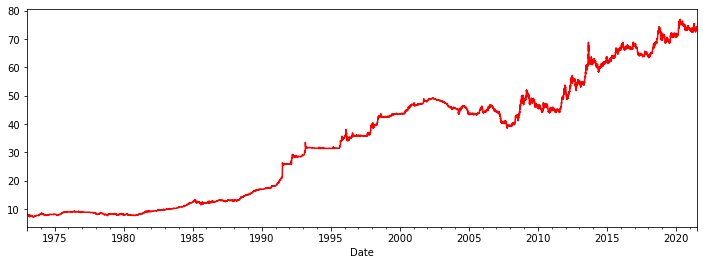

In [18]:
# Line plot
plt.figure(figsize = (12,4))
data_impu.DEXINUS.plot(color = 'r')
plt.show()

### Line plot for 10 years interval data

[]

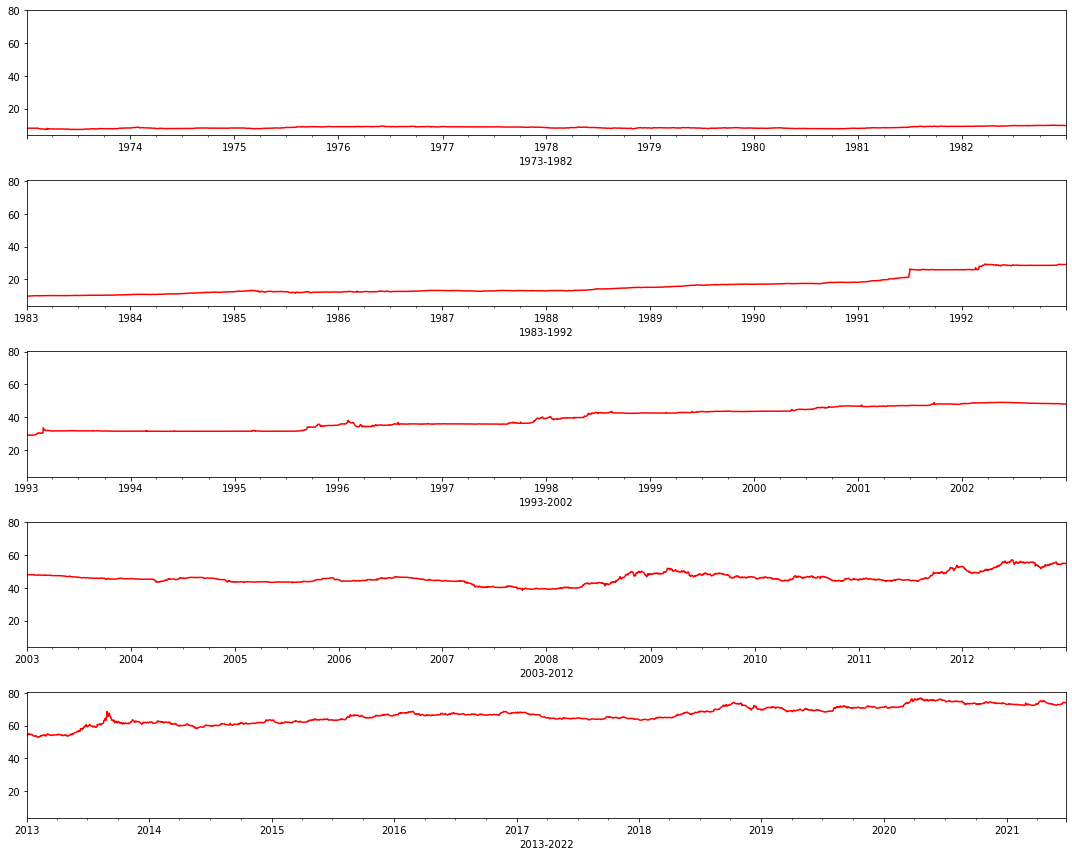

In [19]:
fig, ax = plt.subplots(5, 1, figsize = (15,12),sharey=True)
data_impu.loc['1973':'1982']['DEXINUS'].plot(xlabel = "1973-1982",color = 'r',ax=ax[0])
data_impu.loc['1983':'1992']['DEXINUS'].plot(xlabel = "1983-1992",color = 'r',ax=ax[1])
data_impu.loc['1993':'2002']['DEXINUS'].plot(xlabel = "1993-2002",color = "r",ax=ax[2])
data_impu.loc['2003':'2012']['DEXINUS'].plot(xlabel = "2003-2012",color = "r",ax=ax[3])
data_impu.loc['2013':'2022']['DEXINUS'].plot(xlabel = "2013-2022",color = "r",ax=ax[4])
plt.tight_layout()
plt.plot()

### Further fall in Rupee value:- 1973 Oil Crisis
   - INR value fell to 8.10 in 1974 because of Oil Shock that took place in 1973 due to the Organization of Arab Petroleum          Exporting Countries(OAPEC) to reduce production.
   - To combat the situation and the subsequent political crisis, India had to borrow foreign currency. This resulted in the        fall of the Indian currency value and reached a value as high as 17.50 in 1990 shown in second subplot.
### The Economic Crisis in 1991
   - Intrest Payment accounted for 39% of the revenue that the government collected at the time due to this India declared as a      defaulter in the international market. This crisis called for a devaluation of the Indian currency.
   - The devaluation turned the exchange rate of 1 USD to 25.92 INR in the year 1992 this can be absoved in second subplot.
   - The subplots 3 and 4 telling that the exchange rate of INR keep on increasing from 1992 with some flucuations.
   - Abserve the subplot 4, In the period between 2002 to 2007 the rupee stopped declining and stabilised ranging between            RS.44-Rs.48. In late 2007, the Indian Ruppe reached to 39 INR, on account sustained foreign investment flows into the          county.
   - In 2004 the Dollar price was 45.32INR, and in the next 10 years it rose to 62.33.
   - Due to stagnant reforms and declining foreign investment again rupee statred falls in early 2013. The INR value                continuesly increasing from 2013 to till now with some flucuations.
   
### Line plot for 10 years interval data

[]

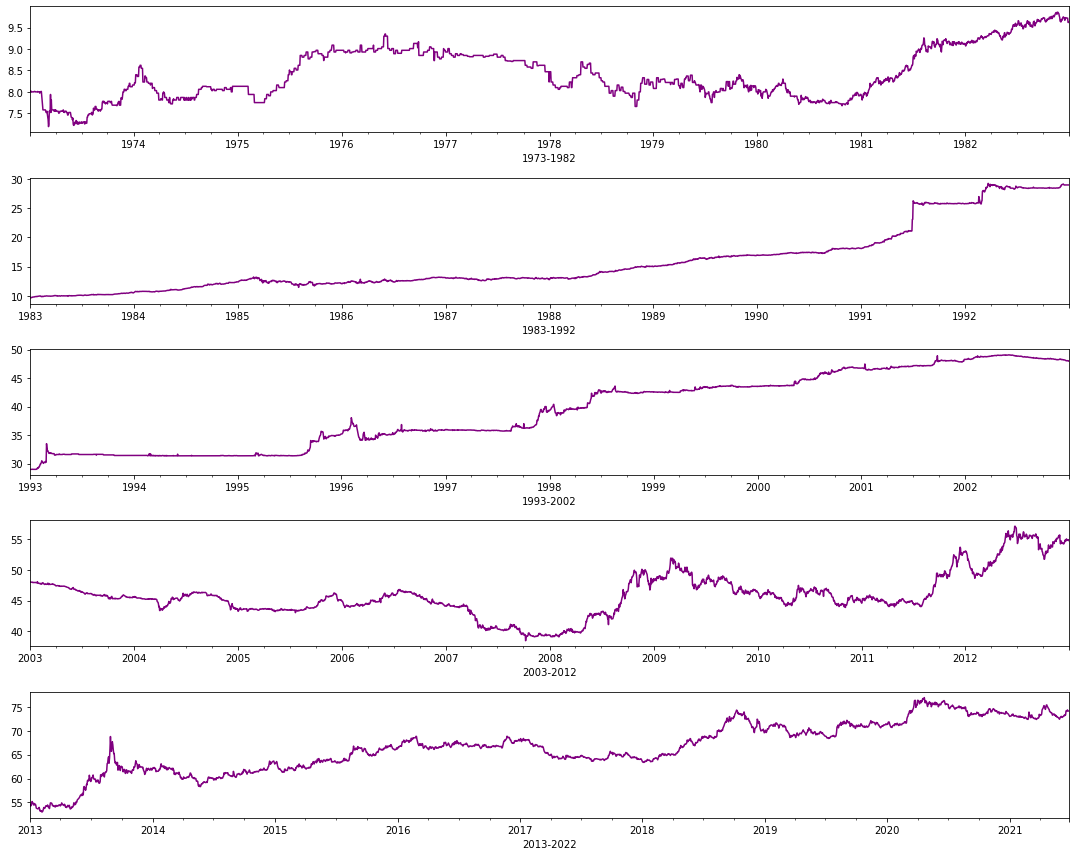

In [20]:
fig, ax = plt.subplots(5, 1, figsize = (15,12))
data_impu.loc['1973':'1982']['DEXINUS'].plot(xlabel = "1973-1982",color = "purple",ax=ax[0])
data_impu.loc['1983':'1992']['DEXINUS'].plot(xlabel = "1983-1992",color = "purple",ax=ax[1])
data_impu.loc['1993':'2002']['DEXINUS'].plot(xlabel = "1993-2002",color = "purple",ax=ax[2])
data_impu.loc['2003':'2012']['DEXINUS'].plot(xlabel = "2003-2012",color = "purple",ax=ax[3])
data_impu.loc['2013':'2022']['DEXINUS'].plot(xlabel = "2013-2022",color = "purple",ax=ax[4])
plt.tight_layout()
plt.plot()

### Boxplot for 10 years interval data

[]

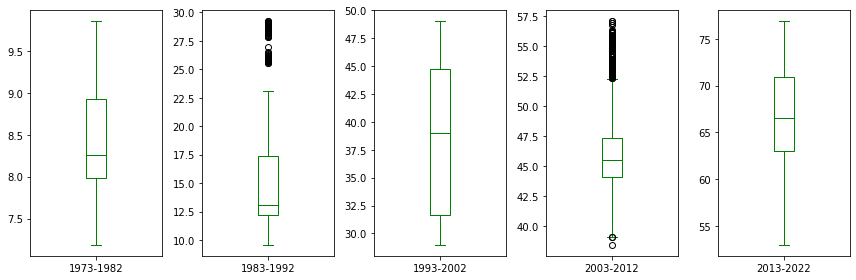

In [21]:
fig, ax = plt.subplots(1, 5, figsize = (12,4))
data_impu.loc['1973':'1982']['DEXINUS'].plot(label = "1973-1982",kind = "box",color = "g",ax=ax[0])
data_impu.loc['1983':'1992']['DEXINUS'].plot(label = "1983-1992",kind = "box",color = "g",ax=ax[1])
data_impu.loc['1993':'2002']['DEXINUS'].plot(label = "1993-2002",kind = "box",color = "g",ax=ax[2])
data_impu.loc['2003':'2012']['DEXINUS'].plot(label = "2003-2012",kind = "box",color = "g",ax=ax[3])
data_impu.loc['2013':'2022']['DEXINUS'].plot(label = "2013-2022",kind = "box",color = "g",ax=ax[4])
plt.tight_layout()
plt.plot()

### Boxplot for 10 years interval data in a single plot

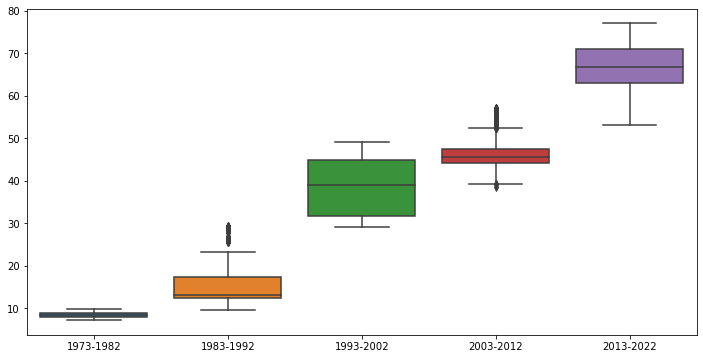

In [22]:
data1 = data_impu.loc['1973':'1982']['DEXINUS']
data2 = data_impu.loc['1983':'1992']['DEXINUS']
data3 = data_impu.loc['1993':'2002']['DEXINUS']
data4 = data_impu.loc['2003':'2012']['DEXINUS']
data5 = data_impu.loc['2013':'2022']['DEXINUS']
d = {'1973-1982':data1, '1983-1992':data2, '1993-2002':data3, '2003-2012':data4,'2013-2022':data5}
plot_data = pd.DataFrame(data=d)
plt.figure(figsize=(12,6))
sns.boxplot(data = plot_data)
plt.show()

### Annual and Month wise Boxplot

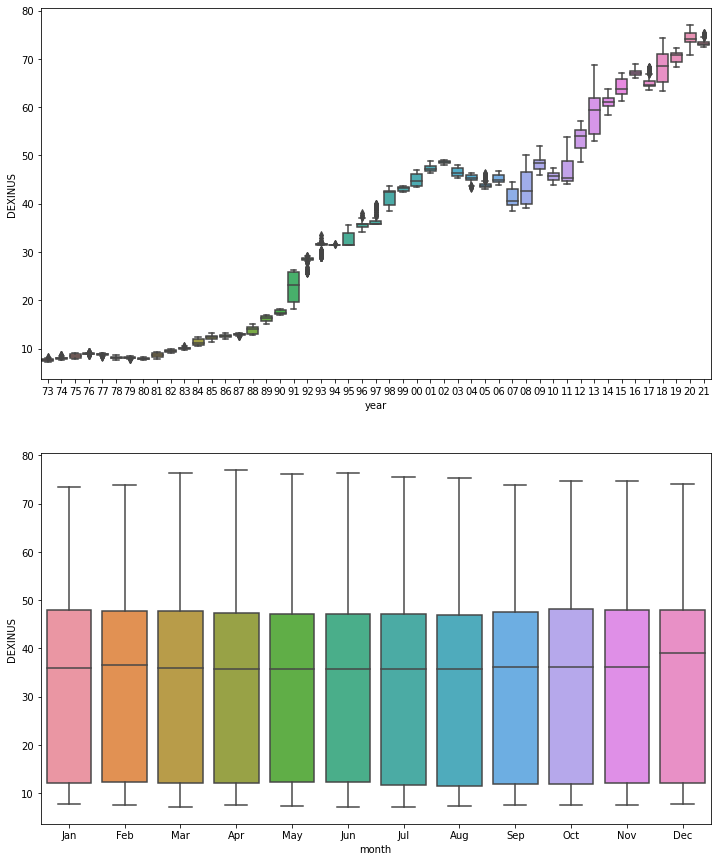

In [23]:
plt.figure(figsize = (12,15))
plt.subplot(211)
sns.boxplot(x = 'year', y = 'DEXINUS', data = data_impu)
plt.subplot(212)
sns.boxplot(x = 'month', y = 'DEXINUS', data = data_impu)
plt.show()

### Heat map

<AxesSubplot:xlabel='month', ylabel='year'>

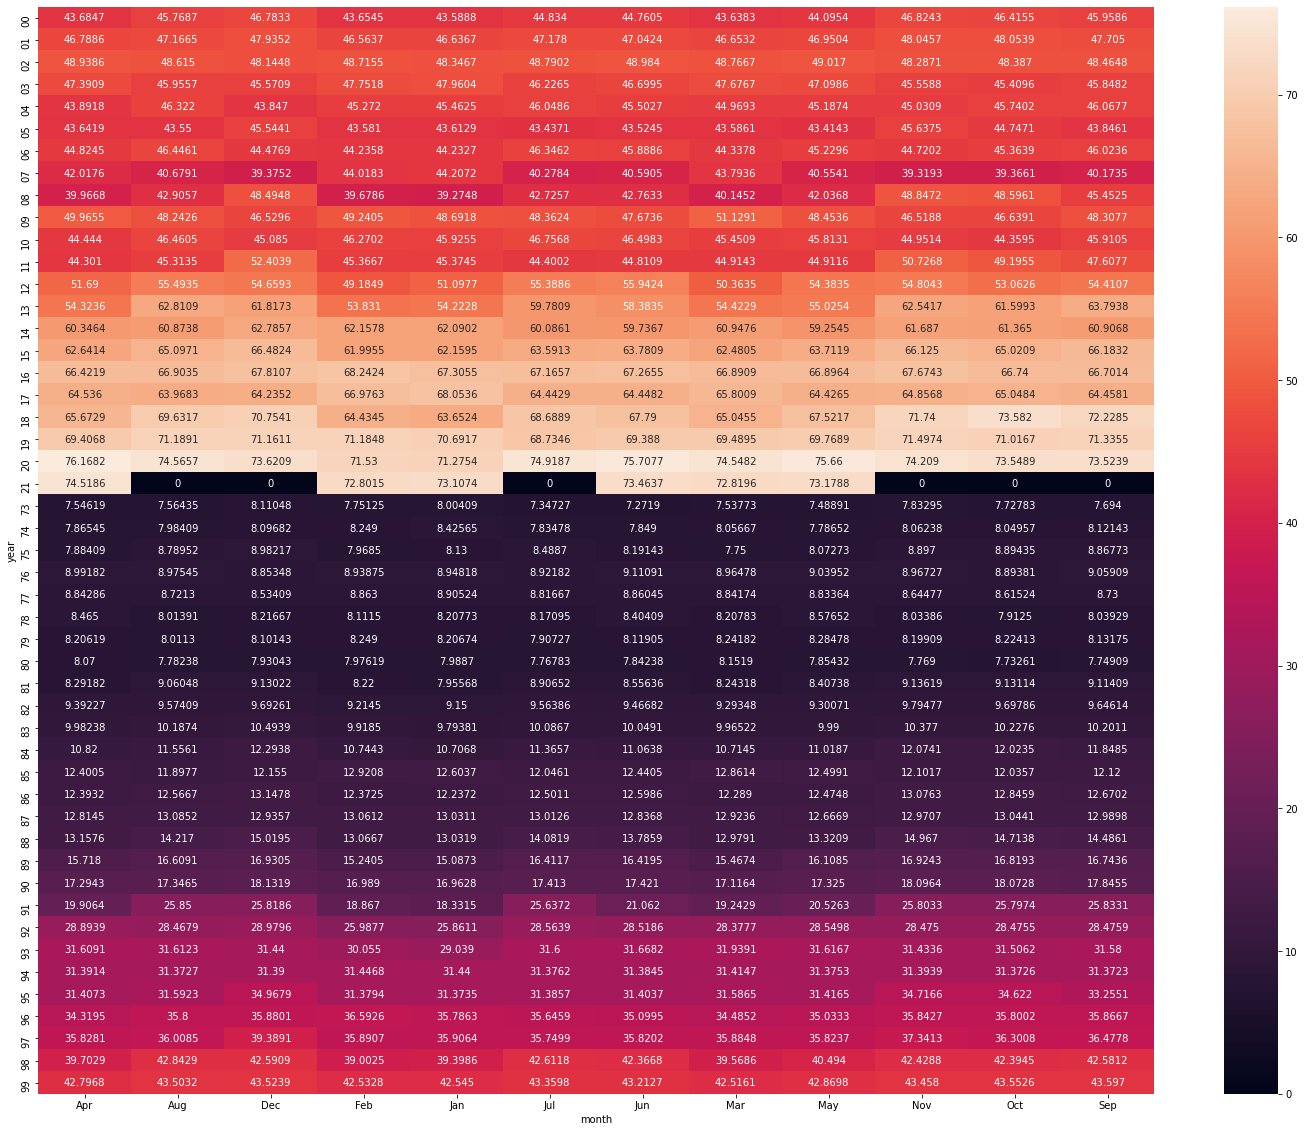

In [24]:
# Heat map
import matplotlib.pyplot as plt
plt.figure(figsize = (25,20))
heatmap_year_month = pd.pivot_table(data = data_impu, values = 'DEXINUS', index = 'year', columns = 'month',\
                                   aggfunc = 'mean', fill_value = 0)
sns.heatmap(heatmap_year_month, annot = True, fmt = 'g')

### Scatterplot and Density plot

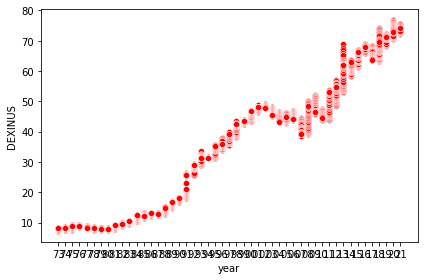

In [25]:
import seaborn as sns
sns.scatterplot(data = data_impu,
                x = "year",y = "DEXINUS",color = 'r')
plt.tight_layout()
plt.show()

### Histogram and Density Plot

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEXINUS', ylabel='Density'>

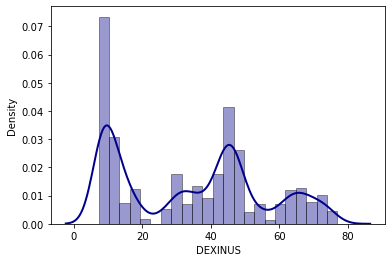

In [26]:
# Histogram
sns.distplot(data_impu['DEXINUS'], hist = True, kde = True, 
             color = "darkblue",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

### Decomposition Plot

<ipython-input-27-fe89726f31d0>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sea_dec = seasonal_decompose(data_impu.DEXINUS, freq = 365)


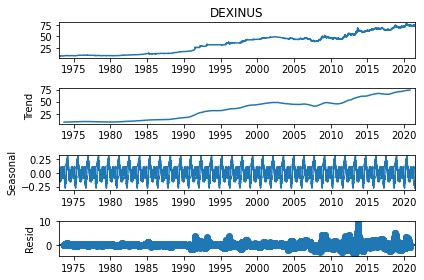

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec = seasonal_decompose(data_impu.DEXINUS, freq = 365)
sea_dec.plot()
plt.show()

### 5. Checking for Stationary data

#### - The null hypothesis: the distribution is non-stationary.
#### - The alternative hypothesis: the distribution is stationary.
 - The p-value determines the result of the test. If it is smaller than a critical threshold of 0.05 or 0.01, we reject the        null hypothesis and conclude that the series is stationary. Otherwise, we fail to reject the null and conclude the series is    non-stationary.
 - I am implementing this test by using the "adfuller" function under "statsmodels".

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
# ADF Test
def adfuller_test(data):
    results = adfuller(data)
    labels = ['ADF Test Statistic','p-value','No.of Lags used','No.of observations used']
    for value,label in zip(results,labels):
        print(label+' : '+str(value))
    if results[1] <= 0.05:
        print("Data is Stationary")
    else:
        print("Data is not Stationary")

In [30]:
adfuller_test(data_impu['DEXINUS'])

ADF Test Statistic : 0.6034527121860698
p-value : 0.9877004241159653
No.of Lags used : 40
No.of observations used : 12608
Data is not Stationary


#### From Dicky-Fuller test it is conclude that the data is non-stationary

### 5.1 Transforming non-stationary series to make it stationary

   - one method to transform non-stationary data is differencing. This process involves taking the difference of consecutive        observations. Pandas has "diff" function to this.

In [31]:
data_impu['diff_1'] = data_impu['DEXINUS'].diff(periods = 1)
# data_impu['diff1'] = data_impu['DEXINUS']-data_impu['DEXINUS'].shift(1)
data_impu

,observation_date,DEXINUS,month,year,DAY,diff_1
Date,,,,,,
1973-01-02,1973-01-02,8.02,Jan,73,02,NaN
1973-01-03,1973-01-03,8.02,Jan,73,03,0.00
1973-01-04,1973-01-04,8.00,Jan,73,04,-0.02
1973-01-05,1973-01-05,8.01,Jan,73,05,0.01
1973-01-08,1973-01-08,8.00,Jan,73,08,-0.01
...,...,...,...,...,...,...
2021-06-21,2021-06-21,74.18,Jun,21,21,0.04
2021-06-22,2021-06-22,74.37,Jun,21,22,0.19
2021-06-23,2021-06-23,74.13,Jun,21,23,-0.24


In [32]:
adfuller_test(data_impu['diff_1'].dropna())

ADF Test Statistic : -17.99324916290183
p-value : 2.749822651580105e-30
No.of Lags used : 39
No.of observations used : 12608
Data is Stationary


- When we apply adfuller test on the original data of DEXINUS, the p-value was close to 1. After differencing, the p-value is flat 2.749e-30, suggesting we reject the null hypothesis and conclude the series is now stationary.

### Plot for differenced data

<AxesSubplot:xlabel='Date'>

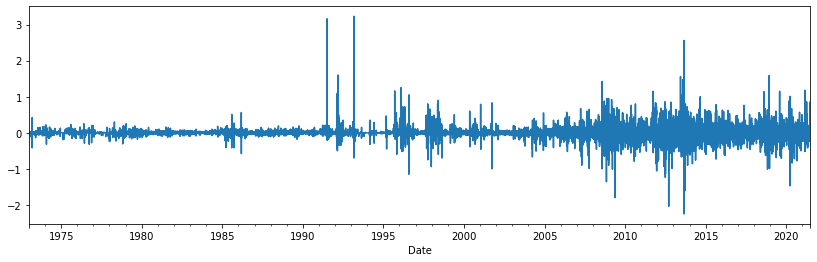

In [33]:
data_impu['diff_1'].plot(figsize=(14,4))

### Decomposition Plot for differenced data

<ipython-input-34-f72c24252e17>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sea_dec = seasonal_decompose(data_impu['diff_1'].dropna(), freq = 365)


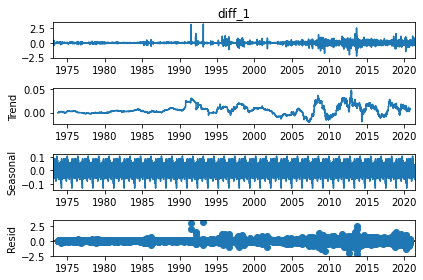

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec = seasonal_decompose(data_impu['diff_1'].dropna(), freq = 365)
sea_dec.plot()
plt.show()

<AxesSubplot:xlabel='diff_1', ylabel='Count'>

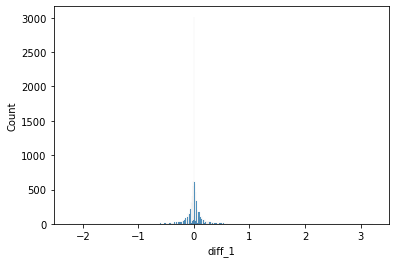

In [35]:
sns.histplot(data_impu['diff_1'])

#### Another case:
- However, some distributions may not be so easy to deal with. Look at the decomposition plot the trend is non-linear.
- Before taking the difference, we have to account for that obvious non-linear trend. Otherwise, the series will still be non-   stationary.
- To remove non-linearity, we will use the logarithmic function np.log and then, take the first-order difference:

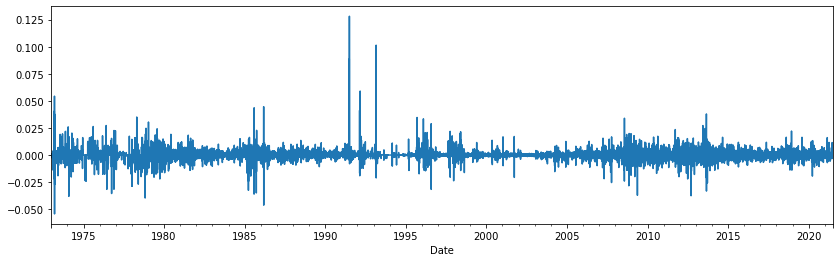

In [36]:
data_impu['transformed_data'] = pd.Series(np.log(data_impu["DEXINUS"])).diff().dropna()
data_impu['transformed_data'].plot(figsize=(14, 4));

In [37]:
adfuller_test(data_impu['transformed_data'].dropna())

ADF Test Statistic : -37.30285981923264
p-value : 0.0
No.of Lags used : 8
No.of observations used : 12639
Data is Stationary


<ipython-input-38-0e0de61aaced>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sea_dec = seasonal_decompose(data_impu['transformed_data'].dropna(), freq = 365)


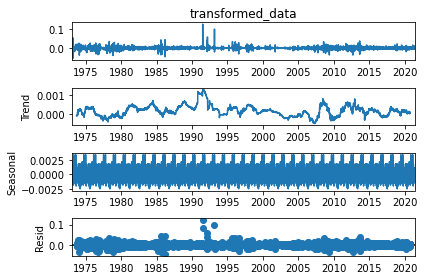

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea_dec = seasonal_decompose(data_impu['transformed_data'].dropna(), freq = 365)
sea_dec.plot()
plt.show()

<AxesSubplot:xlabel='transformed_data', ylabel='Count'>

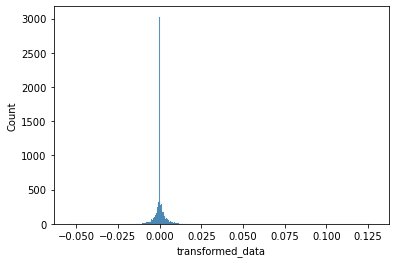

In [39]:
sns.histplot(data_impu['transformed_data'])

### ACF anf PACF plots

   - The correlation between vairable and itself lag is called Auto Correlation.
   - If anyone of the line cross the statistical significance (or) plus-and-minus significance then consider that lag to be          significant. Those lags can be used in our analysis. If the lags are non-significant, those lags are not helpful in             analysis.

<Figure size 864x576 with 0 Axes>

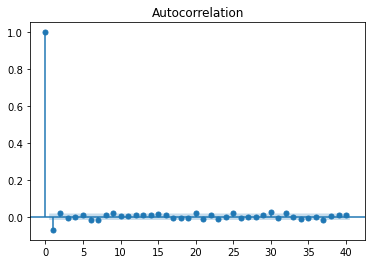

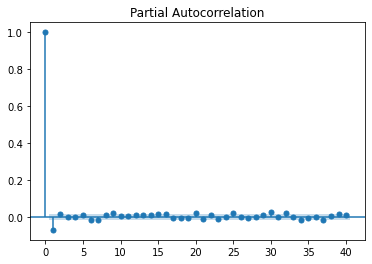

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(12,8))
plot_acf(data_impu['transformed_data'].dropna(),lags=40)
plot_pacf(data_impu['transformed_data'].dropna(),lags=40)
plt.show()

# Model Building

In [85]:
data = pd.DataFrame(data_impu['DEXINUS'].dropna())
data

,DEXINUS
Date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00
...,...
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13


In [86]:
# Splitting the data into train and test
train_data = data['DEXINUS'].head(8854)
test_data = data['DEXINUS'].tail(3795)

In [87]:
# Evaluate Metric Mape
def MAPE(pred,org):
    temp = np.abs((org-pred)/org)*100
    return np.mean(temp)

In [88]:
# Algorithm Package Modules
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

### Holt's Exponential Model

In [89]:
em_model_add = ExponentialSmoothing(train_data, trend = 'add').fit()

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [90]:
pred_em = em_model_add.predict(start = test_data.index[0],end = test_data.index[-1])
pred_em

2006-12-11    44.528741
2006-12-12    44.527918
2006-12-13    44.527095
2006-12-14    44.526272
2006-12-15    44.525449
                ...    
2021-06-21    41.409402
2021-06-22    41.408579
2021-06-23    41.407756
2021-06-24    41.406933
2021-06-25    41.406110
Freq: B, Length: 3795, dtype: float64

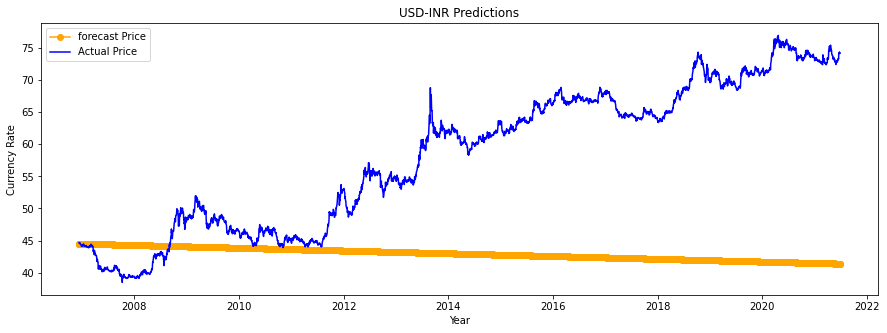

In [92]:
plt.figure(figsize = (15,5))
test_set_range = data[int(len(data)*0.70):].index
plt.plot(test_set_range, pred_em, color='orange', marker='o', linestyle='solid',label='forecast Price')
plt.plot(test_set_range, test_data, color='blue', label='Actual Price')
plt.title('USD-INR Predictions')
plt.xlabel('Year')
plt.ylabel('Currency Rate')
plt.legend()
plt.show()

In [51]:
MAPE(pred_em,test_data)

24.63749308007015

In [52]:
em_model_add = ExponentialSmoothing(data, trend = 'add').fit(smoothing_level = 0.8)
em_model_mul = ExponentialSmoothing(data, trend = 'mul').fit(smoothing_level = 0.8)

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


In [53]:
pred_em_add = em_model_add.forecast(30)
pred_em_mul = em_model_mul.forecast(30)

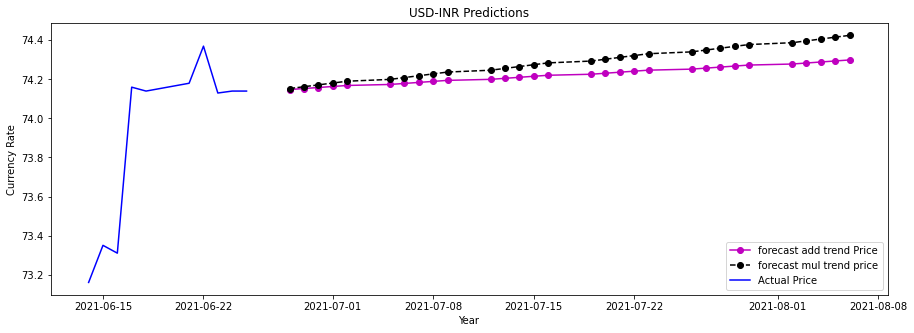

In [54]:
plt.figure(figsize = (15,5))
ac = data.iloc[12639:,:]
plt.plot(pred_em_add, color='m', linestyle='solid',marker = 'o', label='forecast add trend Price')
plt.plot(pred_em_mul, color='k', linestyle='dashed',marker = 'o', label='forecast mul trend price')
plt.plot(ac, color='blue', label='Actual Price')
plt.title('USD-INR Predictions')
plt.xlabel('Year')
plt.ylabel('Currency Rate')
plt.legend()
plt.show()

### AR(p)- Auto Regressive Model

In [55]:
from statsmodels.tsa.ar_model import AutoReg

In [57]:
AR_model = AutoReg(train_data, lags=2).fit()
pred_AR = AR_model.predict(start = test_data.index[0], end = test_data.index[-1])
MAPE(pred_AR,test_data)

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


10.92230330917309

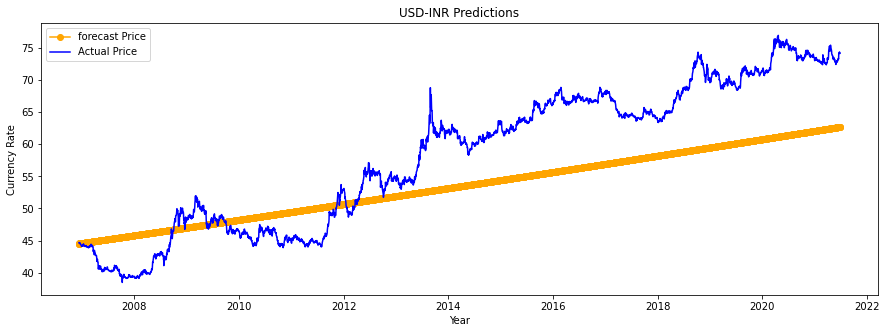

In [58]:
plt.figure(figsize = (15,5))
test_set_range = data[int(len(data)*0.70):].index
plt.plot(test_set_range, pred_AR, color='orange', marker='o', linestyle='solid',label='forecast Price')
plt.plot(test_set_range, test_data, color='blue', label='Actual Price')
plt.title('USD-INR Predictions')
plt.xlabel('Year')
plt.ylabel('Currency Rate')
plt.legend()
plt.show()

In [59]:
# AR model with entire dataset
AR_model_ed = AutoReg(data, lags = 2).fit()

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [60]:
pred_AR_ed = AR_model_ed.forecast(30)
pred_AR_ed

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


2021-06-28    74.147296
2021-06-29    74.154458
2021-06-30    74.161623
2021-07-01    74.168788
2021-07-02    74.175953
2021-07-05    74.183119
2021-07-06    74.190285
2021-07-07    74.197451
2021-07-08    74.204618
2021-07-09    74.211785
2021-07-12    74.218952
2021-07-13    74.226120
2021-07-14    74.233288
2021-07-15    74.240457
2021-07-16    74.247626
2021-07-19    74.254795
2021-07-20    74.261964
2021-07-21    74.269134
2021-07-22    74.276304
2021-07-23    74.283475
2021-07-26    74.290646
2021-07-27    74.297817
2021-07-28    74.304989
2021-07-29    74.312161
2021-07-30    74.319333
2021-08-02    74.326506
2021-08-03    74.333679
2021-08-04    74.340852
2021-08-05    74.348026
2021-08-06    74.355200
Freq: B, dtype: float64

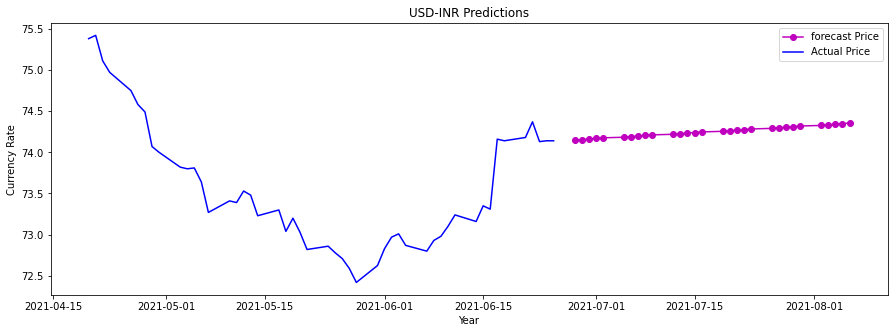

In [61]:
plt.figure(figsize = (15,5))
ac = data.iloc[12600:,:]
plt.plot(pred_AR_ed, color='m', linestyle='solid',marker = 'o', label='forecast Price')
plt.plot(ac, color='blue', label='Actual Price')
plt.title('USD-INR Predictions')
plt.xlabel('Year')
plt.ylabel('Currency Rate')
plt.legend()
plt.show()

### MA-Moving Average

In [68]:
from statsmodels.tsa.arima.model import ARIMA

In [64]:
MA_model = ARIMA(train_data, order=(0, 0, 1)).fit()
pred_MA = MA_model.predict(start = test_data.index[0], end = test_data.index[-1])
MAPE(pred_MA,test_data)

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


57.15730697924759

In [65]:
# Model for entire dataset
MA_model_ed = ARIMA(data, order=(0, 0, 1)).fit()

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


In [66]:
pred_MA = MA_model_ed.forecast(30)
pred_MA

2021-06-28    54.223767
2021-06-29    34.210860
2021-06-30    34.210860
2021-07-01    34.210860
2021-07-02    34.210860
2021-07-05    34.210860
2021-07-06    34.210860
2021-07-07    34.210860
2021-07-08    34.210860
2021-07-09    34.210860
2021-07-12    34.210860
2021-07-13    34.210860
2021-07-14    34.210860
2021-07-15    34.210860
2021-07-16    34.210860
2021-07-19    34.210860
2021-07-20    34.210860
2021-07-21    34.210860
2021-07-22    34.210860
2021-07-23    34.210860
2021-07-26    34.210860
2021-07-27    34.210860
2021-07-28    34.210860
2021-07-29    34.210860
2021-07-30    34.210860
2021-08-02    34.210860
2021-08-03    34.210860
2021-08-04    34.210860
2021-08-05    34.210860
2021-08-06    34.210860
Freq: B, Name: predicted_mean, dtype: float64

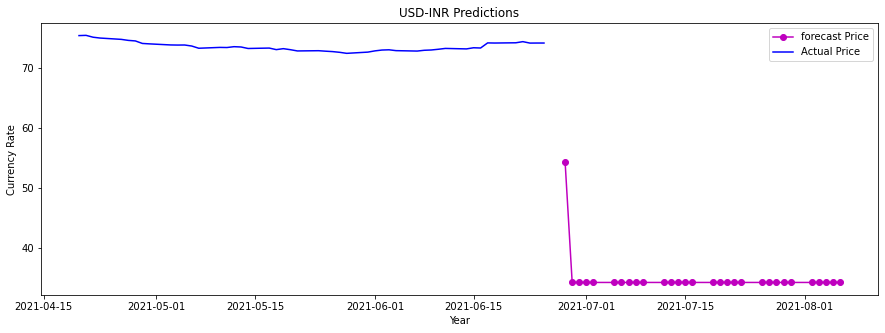

In [67]:
plt.figure(figsize = (15,5))
ac = data.iloc[12600:,:]
plt.plot(pred_MA, color='m', linestyle='solid',marker = 'o', label='forecast Price')
plt.plot(ac, color='blue', label='Actual Price')
plt.title('USD-INR Predictions')
plt.xlabel('Year')
plt.ylabel('Currency Rate')
plt.legend()
plt.show()

# ARIMA model

In [69]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

train_data, test_data =  data[0:int(len(data) * 0.70)], data[int(len(data) * 0.70):]
training_data = train_data['DEXINUS'].values
testing_data = test_data['DEXINUS'].values
history = [x for x in training_data]
model_predictions = []
for t in range(len(testing_data)):
    model = ARIMA(history, order = (3,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    test_value = testing_data[t]
    history.append(test_value)
rmse = sqrt(mean_squared_error(testing_data, model_predictions))
print("Root Mean Squared Error is {}".format(rmse))

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Root Mean Squared Error is 0.2746678598192513


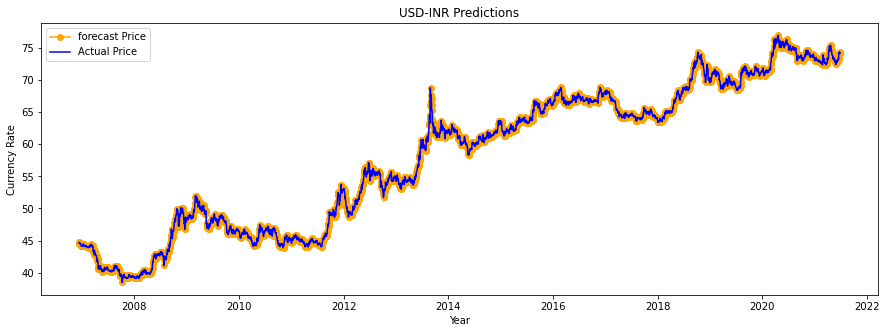

In [70]:
plt.figure(figsize = (15,5))
test_set_range = data[int(len(data)*0.70):].index
plt.plot(test_set_range, model_predictions, color='orange', marker='o', linestyle='solid',label='forecast Price')
plt.plot(test_set_range, test_data, color='blue', label='Actual Price')
plt.title('USD-INR Predictions')
plt.xlabel('Year')
plt.ylabel('Currency Rate')
plt.legend()
plt.show()

In [71]:
MAPE(model_predictions,testing_data)

23.083128396201733

In [72]:
# ARIMA model on entire dataset
model = ARIMA(data, order=(3,1,0))
model_fit = model.fit()

C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Irfan Shaik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

In [73]:
pred_arima = model_fit.forecast(steps = 30)[0]
pred_arima

array([74.14553613, 74.15100016, 74.15621798, 74.16143417, 74.16666231,
       74.17189075, 74.1771186 , 74.18234643, 74.18757429, 74.19280216,
       74.19803002, 74.20325788, 74.20848574, 74.2137136 , 74.21894146,
       74.22416932, 74.22939718, 74.23462504, 74.2398529 , 74.24508076,
       74.25030862, 74.25553648, 74.26076434, 74.2659922 , 74.27122006,
       74.27644792, 74.28167578, 74.28690364, 74.2921315 , 74.29735936])

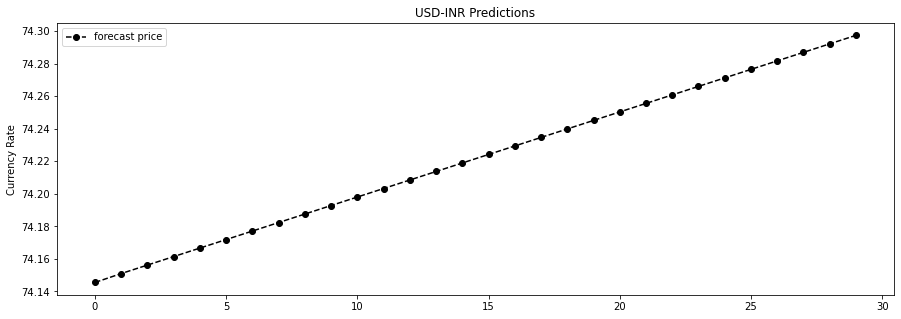

In [74]:
plt.figure(figsize = (15,5))
plt.plot(pred_arima, color='k', linestyle='dashed',marker = 'o', label='forecast price')
plt.title('USD-INR Predictions')
plt.ylabel('Currency Rate')
plt.legend()
plt.show()